In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder

In [191]:
df = pd.read_csv('listings.csv', index_col='id')
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
1419,Home in Toronto · ★5.0 · 5 bedrooms · 7 beds ·...,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,28,6,2017-08-07,0.06,1,0,0,NaN
8077,Rental unit in Toronto · ★4.84 · 1 bedroom · 1...,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,NaN,180,169,2013-08-27,0.97,2,0,0,NaN
380910,Home in Toronto · ★4.88 · 1 bedroom · 1 bed · ...,1910540,Lesley,NaN,Danforth,43.68087,-79.34306,Private room,95.0,1,116,2023-10-25,1.01,1,347,24,STR-2101-HYRVHL
26654,Condo in Toronto · ★4.79 · 1 bedroom · 2 beds ...,113345,Adela,NaN,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,145.0,28,42,2023-09-01,0.27,5,51,2,NaN
390395,Townhouse in Toronto · ★4.83 · 1 bedroom · 1 b...,1952926,Sean,NaN,Moss Park,43.65612,-79.36054,Private room,60.0,28,829,2022-10-22,5.81,1,62,0,NaN


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19994 entries, 1419 to 1042698707756849426
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            19994 non-null  object 
 1   host_id                         19994 non-null  int64  
 2   host_name                       19992 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   19994 non-null  object 
 5   latitude                        19994 non-null  float64
 6   longitude                       19994 non-null  float64
 7   room_type                       19994 non-null  object 
 8   price                           18968 non-null  float64
 9   minimum_nights                  19994 non-null  int64  
 10  number_of_reviews               19994 non-null  int64  
 11  last_review                     14856 non-null  object 
 12  reviews_per_mon

In [193]:
df.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [194]:
df.isnull().sum()

name                                  0
host_id                               0
host_name                             2
neighbourhood_group               19994
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              1026
minimum_nights                        0
number_of_reviews                     0
last_review                        5138
reviews_per_month                  5138
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           10730
dtype: int64

In [195]:
data=df.drop(columns=['host_id','host_name','neighbourhood_group','license','number_of_reviews','last_review','number_of_reviews_ltm','neighbourhood','reviews_per_month'],axis=1)
data.head()

,name,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
id,,,,,,,,
1419,Home in Toronto · ★5.0 · 5 bedrooms · 7 beds ·...,43.64590,-79.42423,Entire home/apt,469.0,28,1,0
8077,Rental unit in Toronto · ★4.84 · 1 bedroom · 1...,43.64080,-79.37673,Private room,NaN,180,2,0
380910,Home in Toronto · ★4.88 · 1 bedroom · 1 bed · ...,43.68087,-79.34306,Private room,95.0,1,1,347
26654,Condo in Toronto · ★4.79 · 1 bedroom · 2 beds ...,43.64608,-79.39032,Entire home/apt,145.0,28,5,51
390395,Townhouse in Toronto · ★4.83 · 1 bedroom · 1 b...,43.65612,-79.36054,Private room,60.0,28,1,62


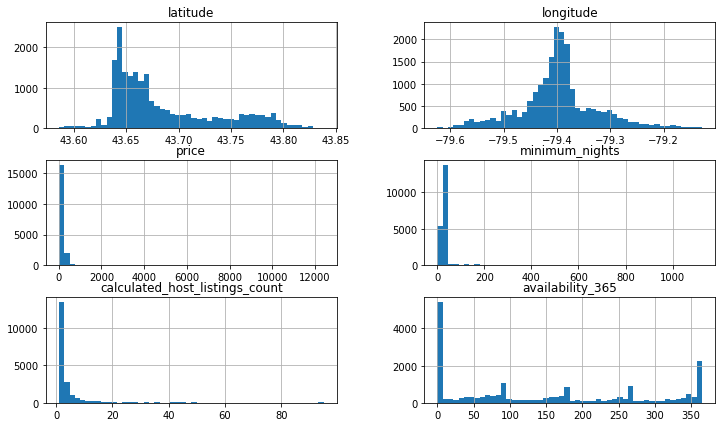

In [196]:
data.hist(bins=50,figsize=(12,7));

C:\Users\saras\AppData\Local\Temp\ipykernel_27272\2309002448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<AxesSubplot: xlabel='price', ylabel='Density'>

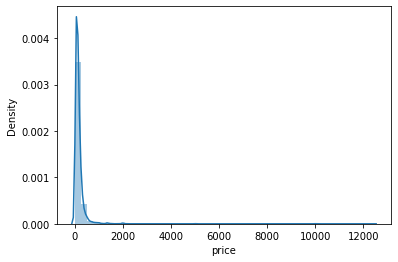

In [197]:
sns.distplot(data['price'])

C:\Users\saras\AppData\Local\Temp\ipykernel_27272\320210500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['price']))


<AxesSubplot: xlabel='price', ylabel='Density'>

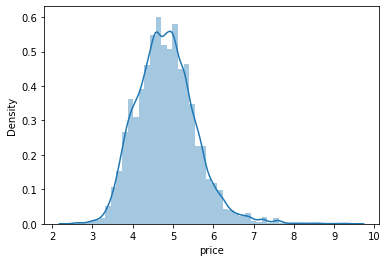

In [198]:
sns.distplot(np.log(data['price']))

In [199]:
data['room_type'].value_counts()

Entire home/apt    12961
Private room        6848
Shared room          184
Hotel room             1
Name: room_type, dtype: int64

In [200]:
data['room_type']=data['room_type'].replace({'Entire home/apt':0,'Private room':1,'Shared room':2,'Hotel room':3,})

In [201]:
data.head()

,name,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
id,,,,,,,,
1419,Home in Toronto · ★5.0 · 5 bedrooms · 7 beds ·...,43.64590,-79.42423,0,469.0,28,1,0
8077,Rental unit in Toronto · ★4.84 · 1 bedroom · 1...,43.64080,-79.37673,1,NaN,180,2,0
380910,Home in Toronto · ★4.88 · 1 bedroom · 1 bed · ...,43.68087,-79.34306,1,95.0,1,1,347
26654,Condo in Toronto · ★4.79 · 1 bedroom · 2 beds ...,43.64608,-79.39032,0,145.0,28,5,51
390395,Townhouse in Toronto · ★4.83 · 1 bedroom · 1 b...,43.65612,-79.36054,1,60.0,28,1,62


In [202]:
data['name'].value_counts()

Rental unit in Toronto · 1 bedroom · 1 bed · 1 bath                    761
Condo in Toronto · 1 bedroom · 1 bed · 1 bath                          378
Home in Toronto · 1 bedroom · 1 bed · 1 shared bath                    372
Home in Toronto · 1 bedroom · 1 bed · 1 bath                           358
Home in Toronto · ★New · 1 bedroom · 1 bed · 1 bath                    285
                                                                      ... 
Townhouse in Toronto · ★4.79 · 1 bedroom · 1 bed · 1.5 shared baths      1
Condo in Toronto · ★4.70 · 2 bedrooms · 2 beds · 2 baths                 1
Home in Toronto · ★4.92 · 4 bedrooms · 8 beds · 3 baths                  1
Townhouse in Toronto · ★4.29 · 1 bedroom · 1 bed · 1 shared bath         1
Home in Toronto · ★New · 1 bedroom · 1 bed · 2.5 shared baths            1
Name: name, Length: 5679, dtype: int64

In [203]:
data.isnull().sum()

name                                 0
latitude                             0
longitude                            0
room_type                            0
price                             1026
minimum_nights                       0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [204]:
data['price'].fillna(data['price'].median(),inplace=True)
data.isnull().sum()

name                              0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [205]:
data.head(10)

,name,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
id,,,,,,,,
1419,Home in Toronto · ★5.0 · 5 bedrooms · 7 beds ·...,43.64590,-79.42423,0,469.0,28,1,0
8077,Rental unit in Toronto · ★4.84 · 1 bedroom · 1...,43.64080,-79.37673,1,120.0,180,2,0
380910,Home in Toronto · ★4.88 · 1 bedroom · 1 bed · ...,43.68087,-79.34306,1,95.0,1,1,347
26654,Condo in Toronto · ★4.79 · 1 bedroom · 2 beds ...,43.64608,-79.39032,0,145.0,28,5,51
390395,Townhouse in Toronto · ★4.83 · 1 bedroom · 1 b...,43.65612,-79.36054,1,60.0,28,1,62
27423,Rental unit in Toronto · ★4.93 · Studio · 1 be...,43.66884,-79.32725,0,75.0,90,1,188
393873,Rental unit in Toronto · ★4.89 · 1 bedroom · 1...,43.64455,-79.40312,0,115.0,183,1,359
30931,Rental unit in Toronto · 1 bedroom · 2 beds · ...,43.64015,-79.37625,0,120.0,180,2,0
40456,Home in Toronto · ★4.64 · 2 bedrooms · 2 beds ...,43.63539,-79.44010,0,150.0,750,4,361


In [206]:
data['name'].value_counts()

Rental unit in Toronto · 1 bedroom · 1 bed · 1 bath                    761
Condo in Toronto · 1 bedroom · 1 bed · 1 bath                          378
Home in Toronto · 1 bedroom · 1 bed · 1 shared bath                    372
Home in Toronto · 1 bedroom · 1 bed · 1 bath                           358
Home in Toronto · ★New · 1 bedroom · 1 bed · 1 bath                    285
                                                                      ... 
Townhouse in Toronto · ★4.79 · 1 bedroom · 1 bed · 1.5 shared baths      1
Condo in Toronto · ★4.70 · 2 bedrooms · 2 beds · 2 baths                 1
Home in Toronto · ★4.92 · 4 bedrooms · 8 beds · 3 baths                  1
Townhouse in Toronto · ★4.29 · 1 bedroom · 1 bed · 1 shared bath         1
Home in Toronto · ★New · 1 bedroom · 1 bed · 2.5 shared baths            1
Name: name, Length: 5679, dtype: int64

In [207]:
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(data['name'])
label

array([3657, 4786, 3174, ..., 3685, 3682, 3677])

In [208]:
data

,name,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
id,,,,,,,,
1419,Home in Toronto · ★5.0 · 5 bedrooms · 7 beds ·...,43.645900,-79.424230,0,469.0,28,1,0
8077,Rental unit in Toronto · ★4.84 · 1 bedroom · 1...,43.640800,-79.376730,1,120.0,180,2,0
380910,Home in Toronto · ★4.88 · 1 bedroom · 1 bed · ...,43.680870,-79.343060,1,95.0,1,1,347
26654,Condo in Toronto · ★4.79 · 1 bedroom · 2 beds ...,43.646080,-79.390320,0,145.0,28,5,51
390395,Townhouse in Toronto · ★4.83 · 1 bedroom · 1 b...,43.656120,-79.360540,1,60.0,28,1,62
...,...,...,...,...,...,...,...,...
1042629686127100016,Home in Toronto · ★New · 1 bedroom · 1 bed · 1...,43.777711,-79.361978,2,23.0,28,14,270
1042633442841033667,Home in Toronto · ★New · 1 bedroom · 1 bed · 2...,43.667250,-79.372490,1,27.0,28,14,190
1042637809324542955,Home in Toronto · ★New · 1 bedroom · 1 bed · 2...,43.667779,-79.374609,2,27.0,28,14,190


In [209]:
data.drop("name", axis=1, inplace=True)
 
# Appending the array to our dataFrame 
# with column name 'Purchased'
data["name"] = label
 
# printing Dataframe
data

,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,name
id,,,,,,,,
1419,43.645900,-79.424230,0,469.0,28,1,0,3657
8077,43.640800,-79.376730,1,120.0,180,2,0,4786
380910,43.680870,-79.343060,1,95.0,1,1,347,3174
26654,43.646080,-79.390320,0,145.0,28,5,51,948
390395,43.656120,-79.360540,1,60.0,28,1,62,5415
...,...,...,...,...,...,...,...,...
1042629686127100016,43.777711,-79.361978,2,23.0,28,14,270,3679
1042633442841033667,43.667250,-79.372490,1,27.0,28,14,190,3684
1042637809324542955,43.667779,-79.374609,2,27.0,28,14,190,3685


In [216]:
x=data.drop(columns=['price'])
y=data['price'].values.reshape(-1,1)

In [218]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [220]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(15995, 7) (3999, 7) (15995, 1) (3999, 1)


In [239]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, np.ravel(y_train))

LinearRegression()

In [241]:
def rmse(a, b):
    return np.sqrt(np.mean((a-b)**2))

In [242]:
def display_results(model, x, y):
    print("RMSE:", rmse(model.predict(x), y))
    print("Predicted 1-5:", model.predict(x_test[0:5]))
    print("Actual 1-5:", y_test[0:5, 0])
    
display_results(reg, x, y)

RMSE: 309.2575653201749
Predicted 1-5: [239.14594903 198.44446263 208.88906611 228.61405518 207.498974  ]
Actual 1-5: [130. 115. 128. 116. 500.]


In [243]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, np.ravel(y_train))
display_results(dtr, x, y)

RMSE: 464.57867623517177
Predicted 1-5: [111. 100. 128. 108.  88.]
Actual 1-5: [130. 115. 128. 116. 500.]


In [244]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score( reg,x, np.ravel(y), cv=5)
scores

array([0.00398767, 0.02498846, 0.07243563, 0.03949609, 0.02450256])

In [245]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score( dtr,x, np.ravel(y), cv=5)
scores

array([-0.4377646 , -0.47386054, -2.50371875, -0.62516729, -0.52724438])